_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7860      
Total params: 7,860
Trainable params: 7,860
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
 - 5s - loss: 0.7670 - acc: 0.8297
Epoch 2/15
 - 5s - loss: 0.4520 - acc: 0.8830
Epoch 3/15
 - 5s - loss: 0.3992 - acc: 0.8927
Epoch 4/15
 - 5s - loss: 0.3725 - acc: 0.8985
Epoch 5/15
 - 5s - loss: 0.3555 - acc: 0.9027
Epoch 6/15
 - 5s - loss: 0.3431 - acc: 0.9061
Epoch 7/15
 - 5s - loss: 0.3336 - acc: 0.9081
Epoch 8/15
 - 5s - loss: 0.3261 - acc: 0.9103
Epoch 9/15
 - 5s - loss: 0.3199 - acc: 0.9113
Epoch 10/15
 - 5s - loss: 0.3145 - acc: 0.9129
Epoch 11/15
 - 5s - loss: 0.3098 - acc: 0.9142
Epoch 12/15
 - 5s - loss: 0.3057 - acc: 0.9155
Epoch 13/15
 - 5s - loss: 0.3021 - acc: 0.9169
Epoch 14/15
 - 5s - loss: 0.2989 - acc: 0.9178
Epoch 15/15
 - 5s -

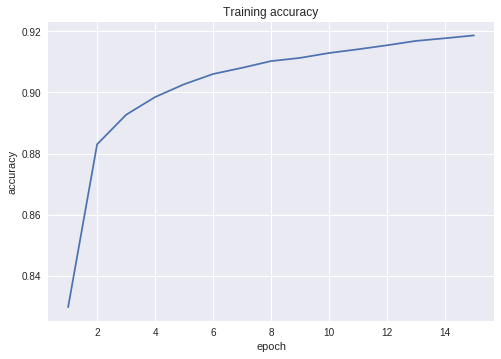

Test accuracy of the model is: 92.1%, ie 9210/10000


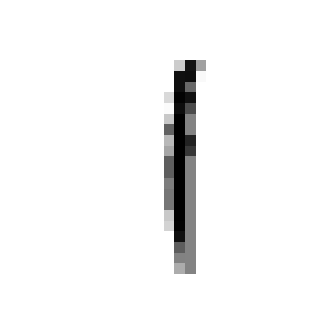

Above image is predicted as 1, which is True


In [10]:

from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from skimage import measure
import cv2

def show_image(x):
    image = x.reshape(28,28)
    plt.imshow(image)
    plt.axis("off")
    plt.show()
    
def plot_training_acc(acc):  # TO GENERATE EPOCH VS ACC PLOT
    plt.plot(range(1,len(acc)+1), acc)
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.title('Training accuracy')
    plt.show()
    
# RETURNS TWO NUMPY ARRAY WHICH ARE THE COUNTS OF NUMBER OF REGION IN THE IMAGES
def get_extra_features(train, test):
    aa, binary_train=cv2.threshold(train, 0, 1, cv2.THRESH_BINARY)
    aa, binary_test=cv2.threshold(test, 0, 1, cv2.THRESH_BINARY)
    
    n_region_train=[]
    for i in range(len(train)):
        aa, num = measure.label(binary_train[i], neighbors=None, background=1, return_num=True, connectivity=None)
        n_region_train.append(num)
    
    n_region_test=[]
    for i in range(len(test)):
        aa, num = measure.label(binary_test[i], neighbors=None, background=1, return_num=True, connectivity=None)
        n_region_test.append(num)
    return (np.array([n_region_train]),np.array([n_region_test]))
    

# Load the training and test data using Keras, And Reshaping
(train_images, train_y), (test_images, test_y) = mnist.load_data()
train_X=train_images.reshape(-1, train_images.shape[1]*train_images.shape[2]).astype('float')
train_X=train_X/255
test_X=test_images.reshape(-1, test_images.shape[1]*test_images.shape[2]).astype('float')
test_X=test_X/255

# Add (normalizing and then appending) a extra feature IN TRAIN AND TEST BOTH respectively 
extra_train,extra_test=get_extra_features(train_images, test_images)
train_X_new= np.concatenate((train_X, (extra_train/extra_train.max()).T), axis=1)
test_X_new= np.concatenate((test_X, (extra_test/extra_train.max()).T), axis=1)

# Labeling for Each classes (0 to 9) (Y is matrix and y is a vector)
train_Y=np.zeros(shape=(10,len(train_y)), dtype='int')
test_Y=np.zeros(shape=(10,len(test_y)), dtype='int')
for j in range(len(train_y)):
    train_Y[train_y[j]][j]=1
for j in range(len(test_y)):
    test_Y[test_y[j]][j]=1    

# MODELING
model = Sequential()
model.add(Dense(train_Y.T.shape[1],input_shape=(train_X_new.shape[1],), use_bias=True,kernel_initializer='random_uniform', bias_initializer='random_uniform', activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])
model.summary()
cache=model.fit(train_X_new, train_Y.T, epochs=15, verbose=2)
plot_training_acc(cache.history['acc'])

# Prediction and TESTING
Prediction=model.predict(test_X_new) #matrix 10000*10
prediction=np.argmax(Prediction,axis=1) # A vector 10000 
print('Test accuracy of the model is: '+str(100*np.sum(prediction==test_y)/len(prediction))+'%, ie '+str(np.sum(prediction==test_y))+'/'+str(len(test_y)))

# PLOTING 
rand_num = np.random.randint(0,len(test_y))
show_image(test_X[rand_num])
print('Above image is predicted as '+str(prediction[rand_num])+', which is '+str(prediction[rand_num]==test_y[rand_num]) )
